# Heart disease detection :

Predicting and diagnosing heart disease is the biggest challenge in the medical industry and relies on factors such as the physical examination, symptoms and signs of the patient

## Plan
----
### EDA :
----
 **Analysis of the shape :**

* Identification of the target : 

* Number of rows and columns  : 

* Variables type : 

* Identification of missing values : 
 

 **Substantive analysis :**

* Target visualization : 

* Understanding the different variables :

* Visualization of relations : features/Target :

* Identification of outliers :

### Preprocessing :
----
* Creation of the Train Set / Test Set
* Removal of NaN : dropna(), imputation, "empty" column
* Encoding
* Removal of outliers harmful to the model 
* Feature selection
* Feature engineering
* Feature scaling

### Modeling :
----
* Define an evaluation function
* Training of different model
* Optimization
* Error analysis and return to Preprocessing / EDA
* Learning curve and Decision Making

### Objectif :
----

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
path = "data/heart_data.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### Analysis :
* Age :
The mean of the age is 54, which means the big part of people are adult
* Sex :
mean = 0.68 which means there is more men than women

### Number of rows and columns :

In [43]:
df.shape

(303, 14)

### Variables type :

In [44]:
df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [45]:
df.columns[df.dtypes == "float64"]

Index(['oldpeak'], dtype='object')

 Only one column (oldpeak) is float

### Identification of missing values :
Here I will do a sns plot to identify missing values 

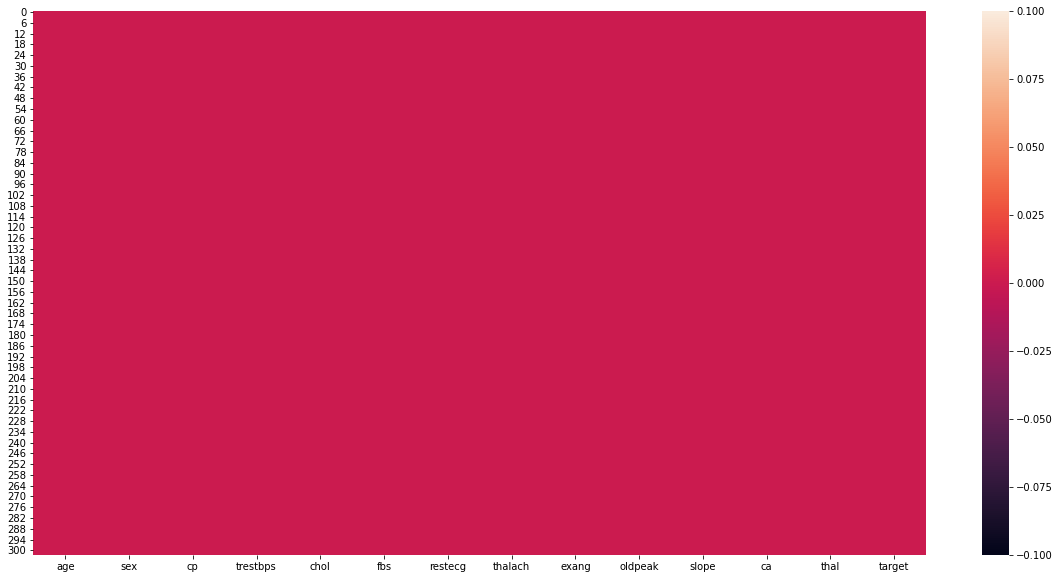

In [46]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna())

All the plot is colored, there is no particular lines, so there is no missing values. We could also run df.info(), and It will give us how many non null values for each variable

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Target visualisation :
The target is a categorical variable : 
* 1 : heart disease
* 2 : no heart disease
<br/>

I will plot the histogram to see how It is distributed

In [48]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

So there is more people that have heart disease than those who don't have it.

Text(0.5, 1.0, 'The distribution of the target variable')

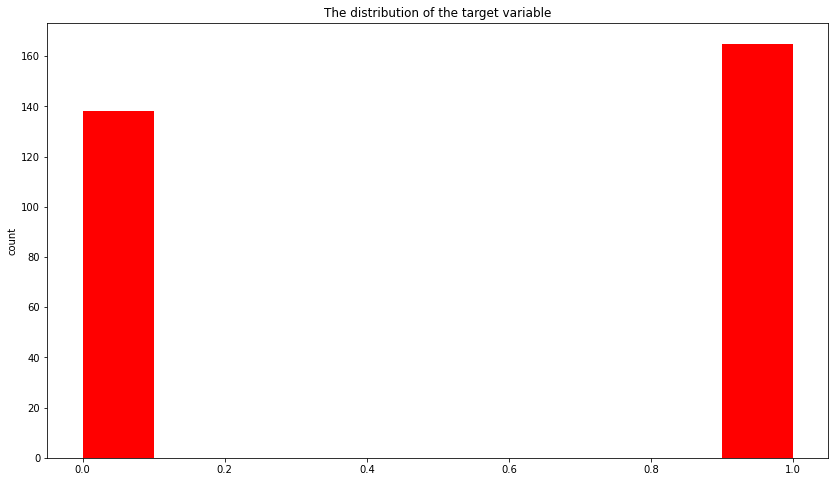

In [49]:
plt.figure(figsize=(14, 8))
plt.hist(df.target, color='r')
plt.ylabel("count")
plt.title("The distribution of the target variable")

## Understanding the different variables :
I will split my variables into continous and categorical variables so that I can use the appropriate plot.

In [50]:
categorical_variables = []
continous_variables = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_variables.append(column)
    else:
        continous_variables.append(column)

### Continous variables :

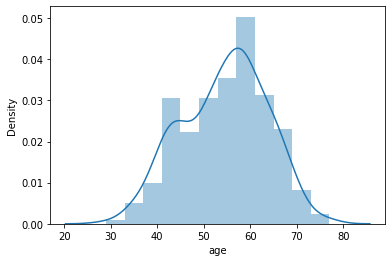

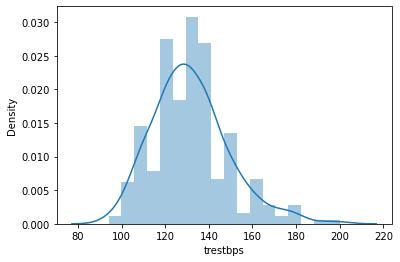

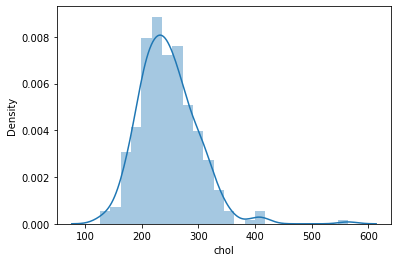

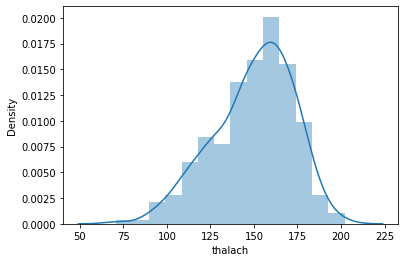

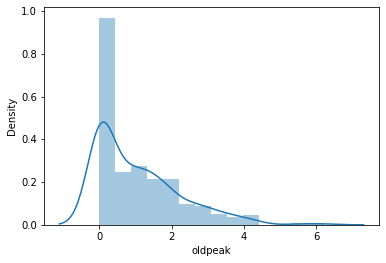

In [51]:
for column in continous_variables:
    plt.figure()
    sns.distplot(df[column])

### Categorical variables :

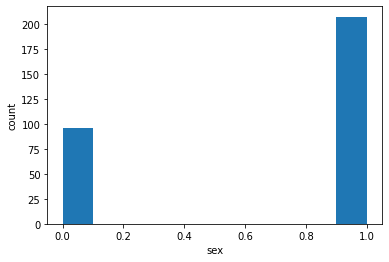

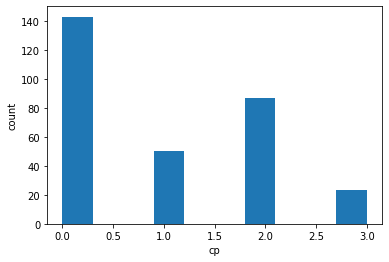

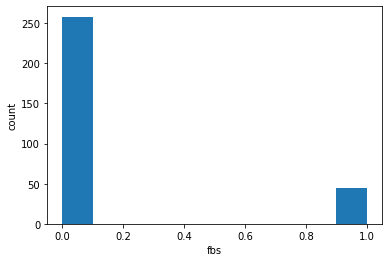

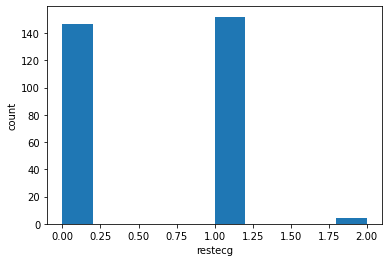

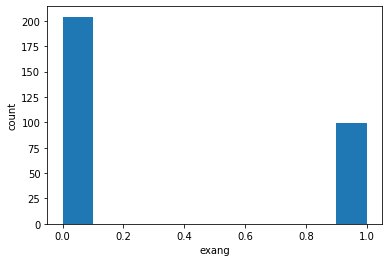

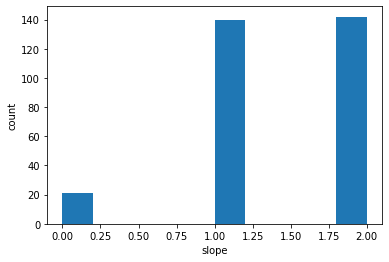

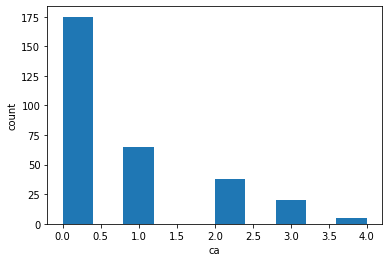

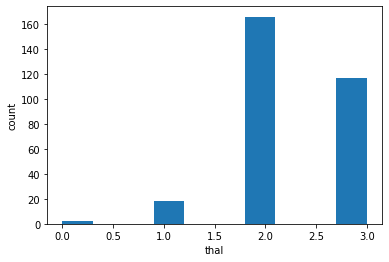

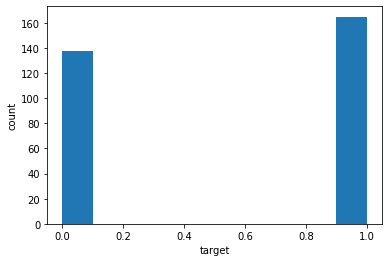

In [52]:
for column in categorical_variables:
    plt.figure()
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel('count')

### Analysis :
* age, trestbps seem to have a normal distribution
* chol and thalach are skewed
* 

## Relation target / variables :

In [53]:
sick = df[df['target'] == 1]
not_sick = df[df['target'] == 0]

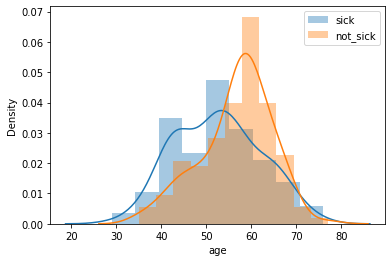

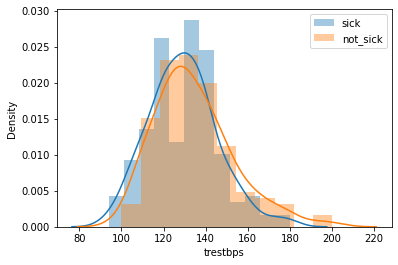

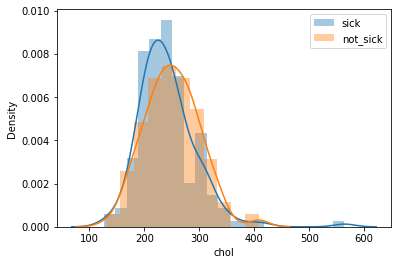

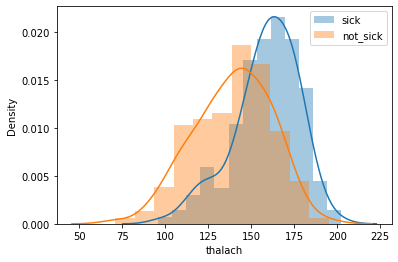

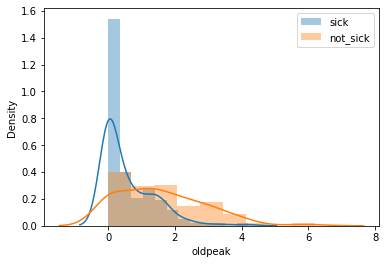

In [54]:
for column in continous_variables:
    plt.figure()
    sns.distplot(sick[column], label='sick')
    sns.distplot(not_sick[column], label='not_sick')
    plt.legend()

As we can see, the distributions of the two
categories (sick and not sick) are different
for some variables and equal for other
variables. To confirm this, I will do a
statistic test (scipy.stats.ttest_ind) that
Calculate the T-test for the means of two
independent samples of scores.
### Null hypothesis :
* H0 = Average rates are EQUAL in sick and not sick individuals

In [55]:
from scipy.stats import ttest_ind

sick.sample(not_sick.shape[0])
def t_test(column):
    alpha = 0.02
    stat, p = ttest_ind(not_sick[column].dropna(), sick[column].dropna())
    if p < alpha:
        return 'H0 rejected'
    else :
        return 0

In [56]:
for column in continous_variables:
    print(f'{column :-<50} {t_test(column)}')

age----------------------------------------------- H0 rejected
trestbps------------------------------------------ H0 rejected
chol---------------------------------------------- 0
thalach------------------------------------------- H0 rejected
oldpeak------------------------------------------- H0 rejected


We conclude that only levels of cholesterol are equals for sick and non sick people.

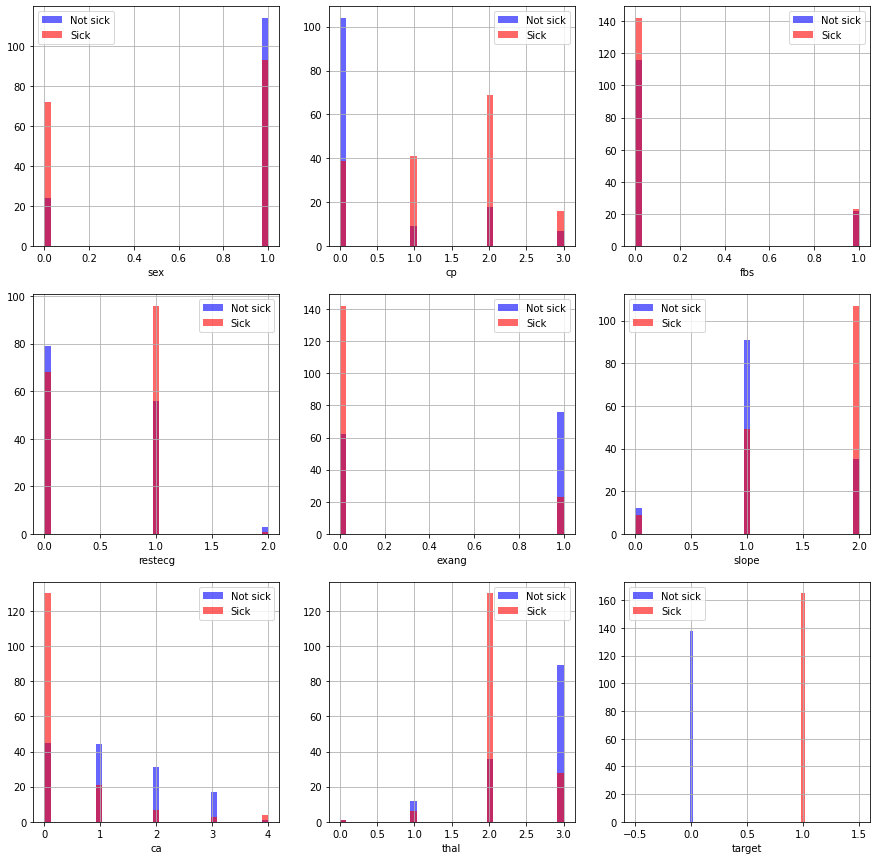

In [57]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    not_sick[column].hist(bins=35, color='blue', label='Not sick', alpha=0.6)
    sick[column].hist(bins=35, color='red', label='Sick', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Analysis of the above plot:

1. cp "Chest pain type": People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.
2. restecg "resting electrocardiographic results": People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.
3. exang "exercise-induced angina": people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)
4. slope "the slope of the peak exercise ST segment": People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
5. ca "number of major vessels (0-3) colored by flourosopy": the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.
6. thal "thalium stress result": People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

### Correlation :

<Figure size 1152x864 with 0 Axes>

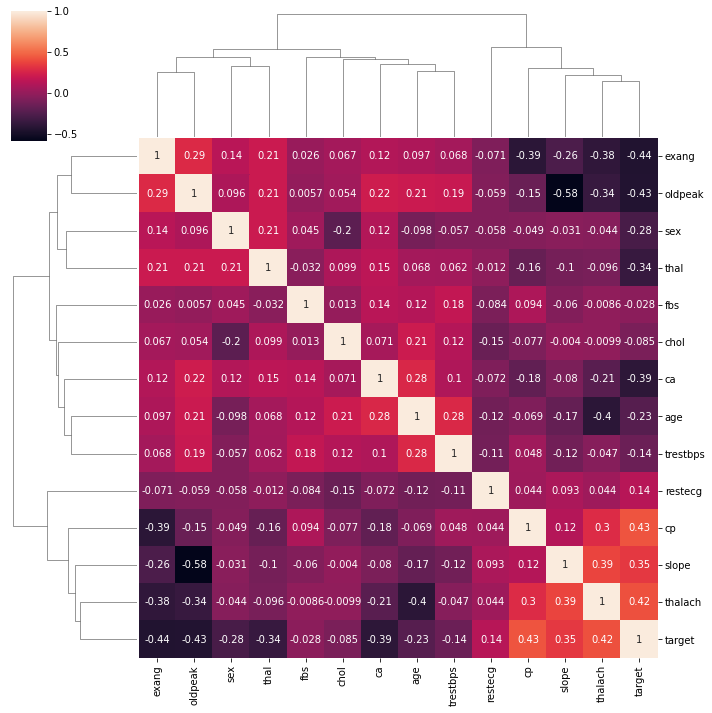

In [58]:
plt.figure(figsize=(16,12))
sns.clustermap(df.corr(), annot=True)

---
the variables are not very correlated but we can notice that for example that the variables thalach (maximum heart rate achieved) and cp (chest pain type) have a large correlation coefficient with the target

## Correlation with target variable :

Text(0.5, 1.0, 'Correlation with target variable')

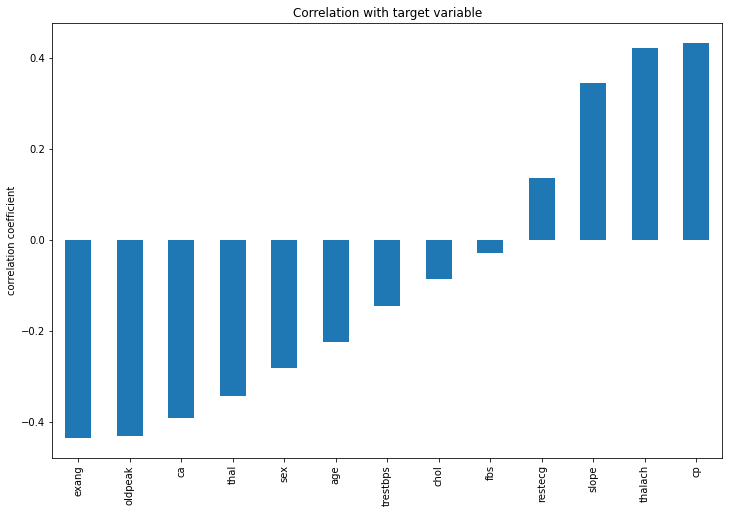

In [59]:
plt.figure(figsize=(12,8))
features = df.drop('target', axis=1)
corr = features.corrwith(df.target).sort_values()
corr.plot(kind="bar")
plt.ylabel("correlation coefficient")
plt.title("Correlation with target variable")

* fbs and chol are the least correlated with the target variable compares to the other variables

## Handling outliers :
### Outliers detection with standard deviation :

In [60]:
df.shape

(303, 14)

In [61]:
factor = 3
for column in df.columns :
    upper_lim = df[column].mean () + df[column].std () * factor
    lower_lim = df[column].mean () - df[column].std () * factor

    df = df[(df[column] < upper_lim) & (df[column] > lower_lim)]

In [62]:
df.shape

(287, 14)

# Preprocessing :

## Creation of the Train Set / Test Set :

In [63]:
features_cols = [x for x in df.columns if x not in 'target']

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)

train_idx, test_idx = next(strat_shuff_split.split(df[features_cols], df['target']))

X_train = df.loc[df.index.intersection(train_idx), features_cols]
y_train = df.loc[df.index.intersection(train_idx), 'target']

X_test = df.loc[df.index.intersection(test_idx), features_cols]
y_test = df.loc[df.index.intersection(test_idx), 'target']

In [65]:
print("Train set shape : ", X_train.shape)
print("Train set shape (target) : ", y_train.shape)
print("Test set shape : ", X_test.shape)
print("Test set shape (target) : ", y_test.shape)

Train set shape :  (215, 13)
Train set shape (target) :  (215,)
Test set shape :  (56, 13)
Test set shape (target) :  (56,)


In [66]:
y_train.value_counts()

1    126
0     89
Name: target, dtype: int64

In [67]:
y_test.value_counts()

1    32
0    24
Name: target, dtype: int64

* So we see that the Stratified Shuffle Split gives us a good split even if the two classes are not balance.

## Removal of NaN : dropna(), imputation, "empty" column :

Since there is no missing values, we have nothing to do in this step

In [68]:
df.shape

(287, 14)

In [69]:
categorical_variables.remove('target')

## Encoding :

In [70]:
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

## Feature scaling :

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,287.0,54.334495,9.093125,29.0,47.0,55.0,61.0,77.0
trestbps,287.0,131.024390,16.991856,94.0,120.0,130.0,140.0,180.0
chol,287.0,244.501742,45.920719,126.0,211.0,241.0,274.0,394.0
thalach,287.0,149.804878,22.550570,88.0,133.5,153.0,166.0,202.0
oldpeak,287.0,1.004878,1.080684,0.0,0.0,0.8,1.6,4.4
target,287.0,0.550523,0.498310,0.0,0.0,1.0,1.0,1.0
sex_1,287.0,0.689895,0.463344,0.0,0.0,1.0,1.0,1.0
cp_1,287.0,0.167247,0.373848,0.0,0.0,0.0,0.0,1.0
cp_2,287.0,0.282230,0.450871,0.0,0.0,0.0,1.0,1.0
cp_3,287.0,0.080139,0.271983,0.0,0.0,0.0,0.0,1.0


In [75]:
from sklearn.preprocessing import StandardScaler
std_s = StandardScaler()

df[continous_variables] = std_s.fit_transform(df[continous_variables])

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,287.0,3.257170e-16,1.001747,-2.790982,-0.808007,0.073316,0.734307,2.496952
trestbps,287.0,-4.729569e-16,1.001747,-2.182755,-0.649938,-0.060392,0.529153,2.887334
chol,287.0,-1.559921e-16,1.001747,-2.585080,-0.730830,-0.076389,0.643496,3.261260
thalach,287.0,-4.773572e-16,1.001747,-2.745511,-0.724299,0.141934,0.719424,2.318624
oldpeak,287.0,-5.152673e-16,1.001747,-0.931478,-0.931478,-0.189913,0.551652,3.147129
target,287.0,5.505226e-01,0.498310,0.000000,0.000000,1.000000,1.000000,1.000000
sex_1,287.0,6.898955e-01,0.463344,0.000000,0.000000,1.000000,1.000000,1.000000
cp_1,287.0,1.672474e-01,0.373848,0.000000,0.000000,0.000000,0.000000,1.000000
cp_2,287.0,2.822300e-01,0.450871,0.000000,0.000000,0.000000,1.000000,1.000000
cp_3,287.0,8.013937e-02,0.271983,0.000000,0.000000,0.000000,0.000000,1.000000


# Modeling

## Assessment procedure :

In [78]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [84]:
def evaluation(model, modelName):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(modelName)
    plt.legend()

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

## Comparing models without fixing hyperparameters :

In [81]:
LR = LogisticRegression(random_state=5)
DT = DecisionTreeClassifier(random_state=5)
SV = SVC(random_state=5)
RF = RandomForestClassifier(random_state=5)
Ex = ExtraTreesClassifier(random_state=5)

In [85]:
dict_of_models = {'LogisticRegression' : LR,
                  'DecisionTree' : DT,
                  'SVM': SV,
                  'RandomForest': RF,
                  'ExtraTrees': Ex
                 }

LogisticRegression
[[21  3]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.91      1.00      0.96        32

    accuracy                           0.95        56
   macro avg       0.96      0.94      0.94        56
weighted avg       0.95      0.95      0.95        56

DecisionTree
[[16  8]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.65        24
           1       0.74      0.72      0.73        32

    accuracy                           0.70        56
   macro avg       0.69      0.69      0.69        56
weighted avg       0.70      0.70      0.70        56

SVM
[[ 8 16]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.89      0.33      0.48        24
           1       0.66      0.97      0.78        32

    accuracy                           0.70        56
   macro avg       0.77      0.65  

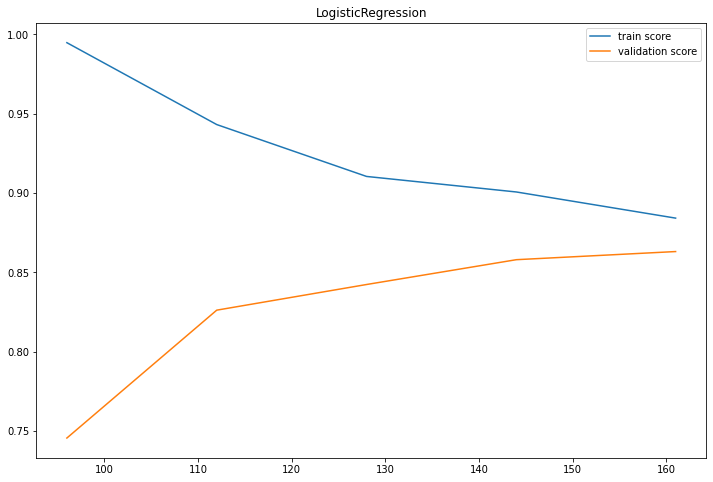

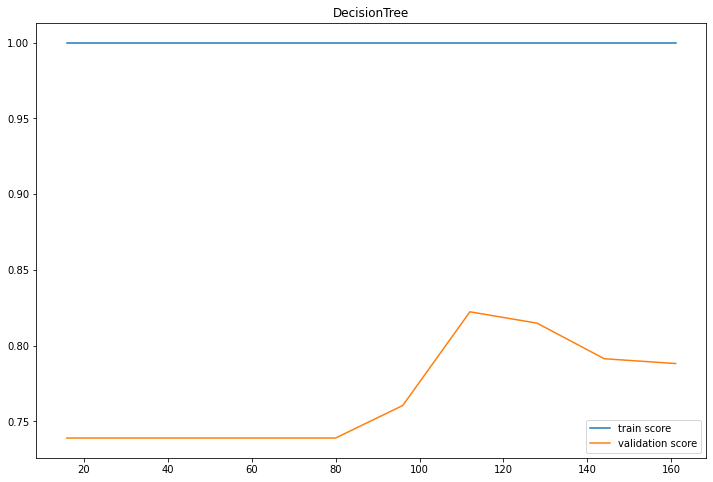

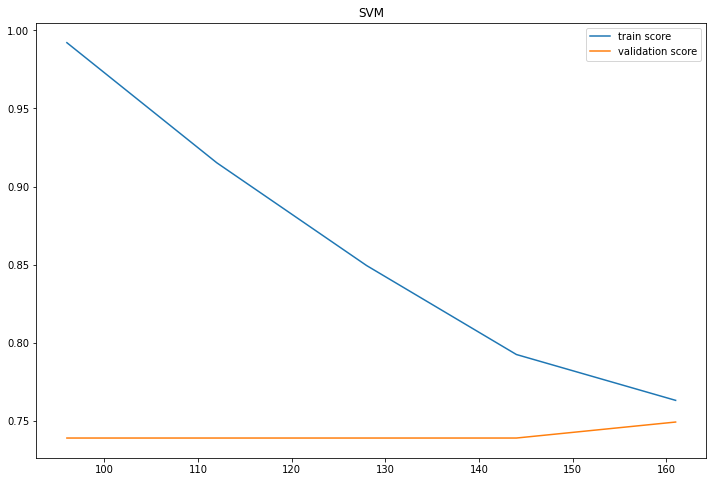

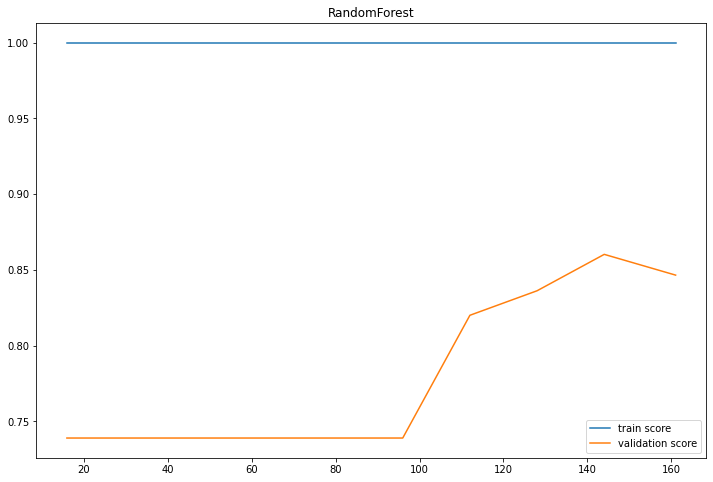

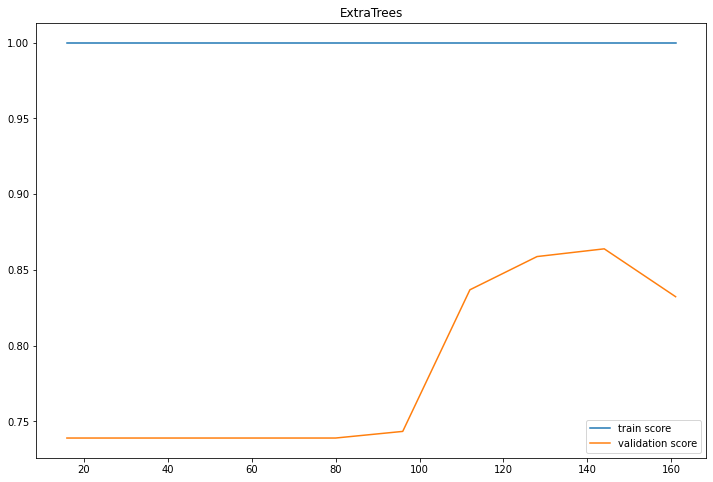

In [86]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model, name)

As we see, the logistic regression gives good results, the tree models are overfitting as expected

## Optimization of the logisticRegression model :

I will apply the l1 and l2 penalty to avoid overfitting

In [91]:
from sklearn.linear_model import LogisticRegressionCV

LR_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear', random_state=5)
LR_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear', random_state=5)

In [92]:
models = {'LogisticRegression_l1' : LR_l1,
          'LogisticRegression_l2' : LR_l2,
         }

LogisticRegression_l1
[[21  3]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.91      1.00      0.96        32

    accuracy                           0.95        56
   macro avg       0.96      0.94      0.94        56
weighted avg       0.95      0.95      0.95        56

LogisticRegression_l2
[[21  3]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.91      1.00      0.96        32

    accuracy                           0.95        56
   macro avg       0.96      0.94      0.94        56
weighted avg       0.95      0.95      0.95        56



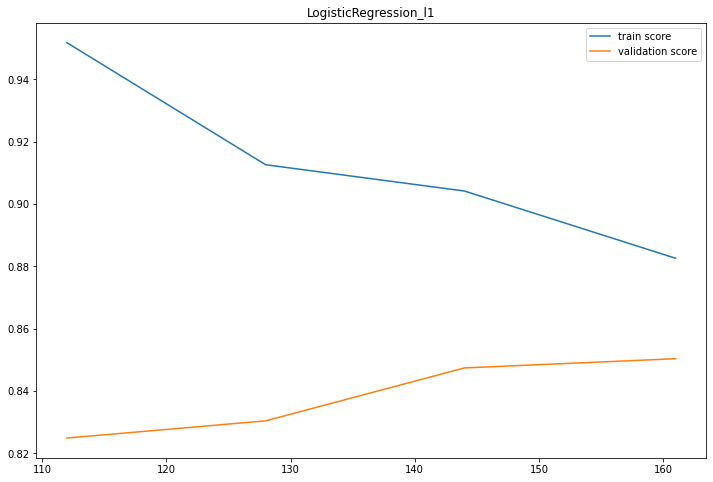

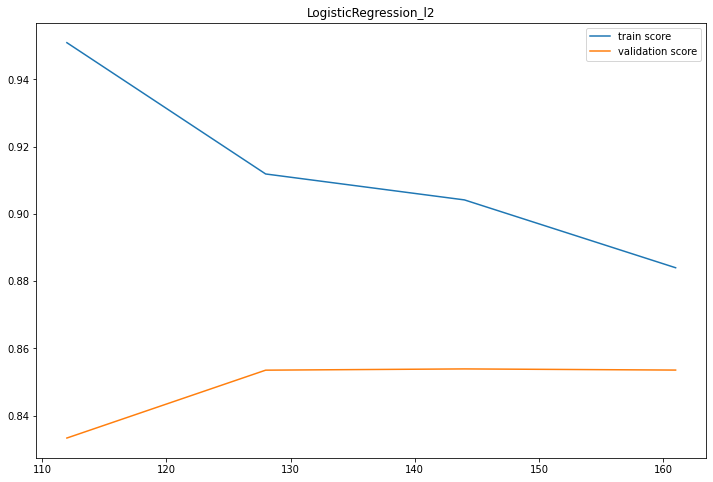

In [93]:
for name, model in models.items():
    print(name)
    evaluation(model, name)

As you can see the models give the same result as the previous, but I will choose the logistic regression with 'l1' penalty because It looks like It's not overfitting. The model performs very well of the test set as it is giving almost the same accuracy in the test set as in the training set.

## Final model :

In [95]:
import pickle

filename = 'final_model.sav'
pickle.dump(LR_l1, open(filename, 'wb'))

# Next steps :

Although, we have good results, we can go further more. We can analyze more the dataset by applying feature engineering techniques like polynomial features, we can tune the hyp